In [1]:
!git clone https://github.com/rohit-krish/Deeplex.git
%cd Deeplex

Cloning into 'Deeplex'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 101 (delta 43), reused 79 (delta 29), pack-reused 0
Receiving objects: 100% (101/101), 148.69 KiB | 16.52 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [65]:
from sklearn.datasets import fetch_openml

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from deeplex import nn, optim, act_func, loss_func
from deeplex.engine import Tensor


## Loading the Data

In [66]:
mnist = fetch_openml('mnist_784', version=1)
X_, y_ = mnist.data, mnist.target
X_ = X_.to_numpy()
y_ = y_.to_numpy().astype('float')

print("MNIST dataset loaded.")
print("X shape:", X_.shape)
print("y shape:", y_.shape)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


MNIST dataset loaded.
X shape: (70000, 784)
y shape: (70000,)


In [67]:
# since deeplex runs on cpu i'm using only small amount of data for time concerns
_, X, _, y = train_test_split(X_, y_, test_size=.01, stratify=y_)
X.shape, y.shape


((700, 784), (700,))

In [68]:
# checking if the data is distributed "equally"
supports = {}

for i in range(10):
    supports[i] = len(y[y == i])

supports


{0: 69, 1: 79, 2: 70, 3: 71, 4: 68, 5: 63, 6: 69, 7: 73, 8: 68, 9: 70}

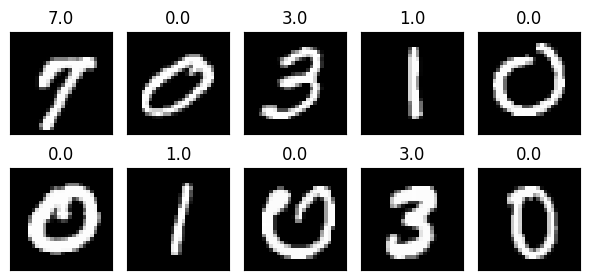

In [69]:
idxs = np.random.randint(0, len(X), 10)
fig, axes = plt.subplots(2, 5, figsize=(6, 3))
axes = axes.flatten()

for idx, ax in zip(idxs, axes):
    img = X[idx].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(y[idx])
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


In [88]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        self.rnn = nn.RNN(input_size, hidden_size, num_layers)
        self.fc = nn.Linear(hidden_size*seq_len, num_classes)

    def __call__(self, x):
        out, _ = self.rnn(x)
        out = out.reshape(len(x), -1)
        out = self.fc(out)
        return out

    def parameters(self):
        params = []
        for l in self.rnn.i2h_layers:
            params += l.parameters()

        for l in self.rnn.h2h_layers:
            params += l.parameters()

        params += self.fc.parameters()
        return params


hidden_size = 256
features = 28
seq_len = 28
n_layers = 2

n_classes = 10
lr = .001
batch_size = 20
n_epochs = 2

model = RNN(features, hidden_size, n_layers, n_classes)
criterion = loss_func.MSELoss
optimizer = optim.Adam(model.parameters(), lr=lr)

if len(X)//batch_size != 1:
    X = X.reshape(len(X)//batch_size, batch_size, 28, 28)  # (n_iter, batch_size, x, y)
    y = y.reshape(len(y)//batch_size, batch_size, 1)       # (n_iter, batch_size, x, y)

print(X.shape, y.shape)


(35, 20, 28, 28) (35, 20, 1)


In [ ]:
for epoch_i in range(n_epochs):
    for data, targets in zip(X, y):

        # forward
        preds = model(data)
        print(preds.shape)
        print(preds[0])
        break
    break
